<a href="https://colab.research.google.com/github/anthonyosei/dataminig/blob/main/MedicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('cardio-vascular--ACWData-1.csv')
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.473452,198992,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,0.218756,253100,CVA,no,no,no,no,no,67.0,100,NoRisk
2,0.131260,155737,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,0.102954,251222,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,0.236142,197183,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.587315,113117,Asx,no,yes,yes,yes,no,74.0,100,Risk
1516,0.932265,103595,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,0.876531,211309,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,0.812032,116379,TIA,no,no,yes,yes,no,75.0,35,NoRisk


In [3]:
df.head

<bound method NDFrame.head of         Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
0     0.473452  198992        CVA      yes  yes          yes        yes   
1     0.218756  253100        CVA       no   no           no         no   
2     0.131260  155737        CVA       no  yes          yes         no   
3     0.102954  251222        A-F       no  yes           no         no   
4     0.236142  197183        CVA       no   no           no         no   
...        ...     ...        ...      ...  ...          ...        ...   
1515  0.587315  113117        Asx       no  yes          yes        yes   
1516  0.932265  103595        CVA       no  yes          yes         no   
1517  0.876531  211309        CVA       no   no          yes         no   
1518  0.812032  116379        TIA       no   no          yes        yes   
1519  0.517688  172848        A-F       no   no           no         no   

     History  IPSI Contra   label  
0         no  89.0    100    Risk

In [4]:
df.columns

Index(['Random', 'Id', 'Indication', 'Diabetes', 'IHD', 'Hypertension',
       'Arrhythmia', 'History', 'IPSI', 'Contra', 'label'],
      dtype='object')

In [5]:
df.tail

<bound method NDFrame.tail of         Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
0     0.473452  198992        CVA      yes  yes          yes        yes   
1     0.218756  253100        CVA       no   no           no         no   
2     0.131260  155737        CVA       no  yes          yes         no   
3     0.102954  251222        A-F       no  yes           no         no   
4     0.236142  197183        CVA       no   no           no         no   
...        ...     ...        ...      ...  ...          ...        ...   
1515  0.587315  113117        Asx       no  yes          yes        yes   
1516  0.932265  103595        CVA       no  yes          yes         no   
1517  0.876531  211309        CVA       no   no          yes         no   
1518  0.812032  116379        TIA       no   no          yes        yes   
1519  0.517688  172848        A-F       no   no           no         no   

     History  IPSI Contra   label  
0         no  89.0    100    Risk

In [6]:
df.describe( include="all") # displays the general infomation of the data

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1520.000000,1520.000000,1517,1518,1520,1517,1520,1518,1516.000000,1520,1517
unique,NaN,NaN,5,2,2,2,2,2,NaN,26,3
top,NaN,NaN,A-F,no,no,no,no,no,NaN,100,NoRisk
freq,NaN,NaN,493,1441,801,784,1190,1494,NaN,283,1008
mean,0.509681,188694.022368,NaN,NaN,NaN,NaN,NaN,NaN,77.872032,NaN,NaN
std,0.284247,64355.870242,NaN,NaN,NaN,NaN,NaN,NaN,10.162351,NaN,NaN
min,0.000000,78590.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN
25%,0.268463,137459.750000,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,NaN,NaN
50%,0.517759,191673.500000,NaN,NaN,NaN,NaN,NaN,NaN,76.000000,NaN,NaN
75%,0.755068,244888.500000,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,NaN,NaN


In [7]:
df.shape

(1520, 11)

In [8]:
#this checks if there are missing values
df.isnull().any() 


Random          False
Id              False
Indication       True
Diabetes         True
IHD             False
Hypertension     True
Arrhythmia      False
History          True
IPSI             True
Contra          False
label            True
dtype: bool

**Dealing with Missinf Data**


From the Data, i can tell there are some missing values and needs to be delth with 


In [9]:
df.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [10]:
#Fill the missing values
df['Indication'] = df['Indication'].fillna(df['Indication'].mode()[0])
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])
df['Hypertension'] = df['Hypertension'].fillna(df['Hypertension'].mode()[0])
df['History'] = df['History'].fillna(df['History'].mode()[0])
df['IPSI'] = df['IPSI'].fillna(df['IPSI'].mean())
df['label'] = df['label'].fillna(df['label'].mode()[0])

In [11]:
#get rid of unkown values
df['label'] = df['label'].str.replace('Unknown', df['label'].mode()[0], )

In [12]:
#replacement of contra values with mode 
df['Contra'] = df['Contra'].str.replace(' ', df['Contra'].mode()[0], )
df['Contra'] = df['Contra'].astype(float)
print(df)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
0     0.473452  198992        CVA      yes  yes          yes        yes   
1     0.218756  253100        CVA       no   no           no         no   
2     0.131260  155737        CVA       no  yes          yes         no   
3     0.102954  251222        A-F       no  yes           no         no   
4     0.236142  197183        CVA       no   no           no         no   
...        ...     ...        ...      ...  ...          ...        ...   
1515  0.587315  113117        Asx       no  yes          yes        yes   
1516  0.932265  103595        CVA       no  yes          yes         no   
1517  0.876531  211309        CVA       no   no          yes         no   
1518  0.812032  116379        TIA       no   no          yes        yes   
1519  0.517688  172848        A-F       no   no           no         no   

     History  IPSI  Contra   label  
0         no  89.0   100.0    Risk  
1         no  67.0   100.

In [13]:
#Count values
countValues_label = df['label'].value_counts()
countValues_label

NoRisk    1013
Risk       507
Name: label, dtype: int64

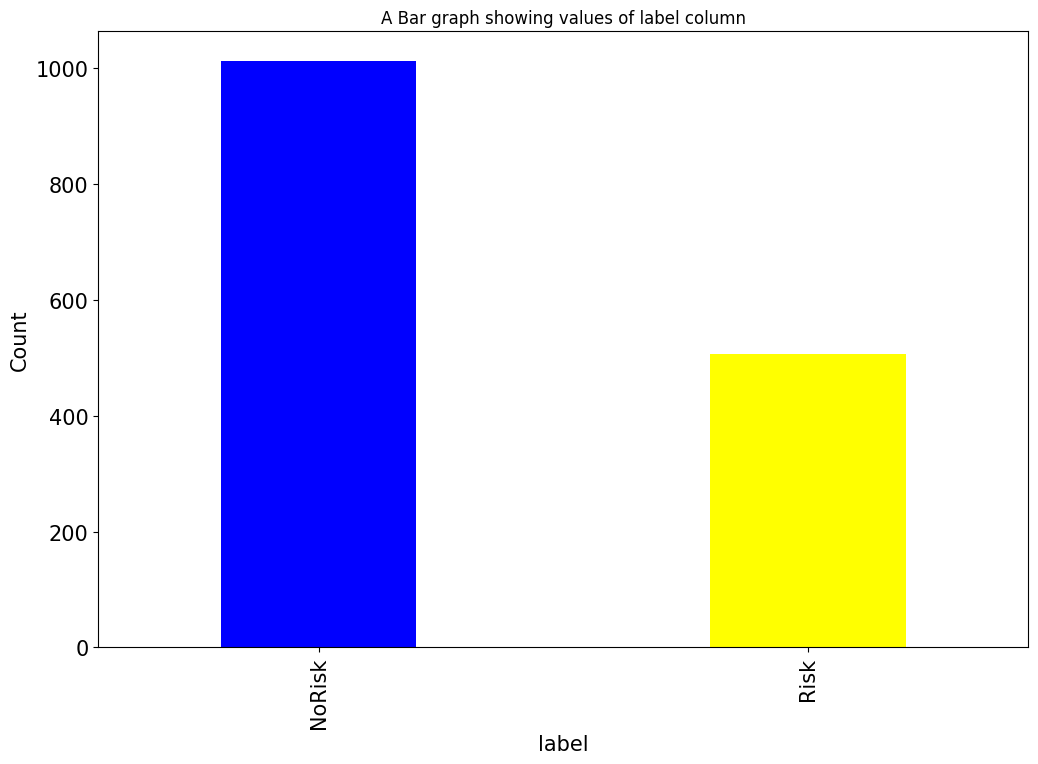

In [17]:
#Displays a bar graph of values of lable column
barGrp = countValues_label.plot(kind='bar',figsize=(12,8), width=0.40 ,color=['blue','yellow'] ,fontsize=15, title='Display of Bar graph with values of label column' )
barGrp.set_xlabel("label",fontsize=15)      
barGrp.set_ylabel("Count",fontsize=15)
plt.show()

In [15]:
df.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra          float64
label            object
dtype: object